In [1]:
cd ..

/home/smaug/ownCloud/praca/reasonable-embeddings/src


In [2]:
from pathlib import Path

base_dir = Path('../local/out/elpp/')

base_dir.mkdir(parents=True, exist_ok=True)

In [3]:
import lzma
import dill

with lzma.open(base_dir / 'reasoners.dill.xz', 'rb') as f:
    reasoners = dill.load(f)


In [4]:
with lzma.open(base_dir / 'test_reasoners.dill.xz', 'rb') as f:
    test_reasoners = dill.load(f)


In [39]:
from src.elpp.ElNaive import ElNaive
import pandas as pd

def proofs_to_df(reasoners: list[ElNaive], min_proof_length: int) -> pd.DataFrame:
    rows = []
    for i, reasoner in enumerate(reasoners):
        for sub in range(reasoner.n_concepts):
            for sup, proof in reasoner.S[sub].items():
                if len(proof) >= min_proof_length:
                    rows.append([i, sub, sup, len(proof)])
    df = pd.DataFrame(rows, columns=['Reasoner', 'Subclass', 'Superclass', 'Length'])
    return df


In [40]:
from IPython.core.display import HTML


def summary(df: pd.DataFrame):
    display(HTML("<h4>Macro average</h4>"))
    display(df.groupby('Reasoner')['Length'].describe()[['count', 'mean']].describe())
    display(HTML("<h4>Micro average</h4>"))
    display(df['Length'].describe())

### Training set, non-asserted

In [42]:
summary(proofs_to_df(reasoners, 2))

,count,mean
count,40.000000,40.000000
mean,870.525000,12.707820
std,1427.168974,9.537185
min,246.000000,4.168478
25%,322.500000,6.598089
50%,373.500000,8.799056
75%,643.000000,13.933403
max,7670.000000,42.036008


count    34821.000000
mean        22.886390
std         17.341742
min          2.000000
25%          8.000000
50%         17.000000
75%         36.000000
max         87.000000
Name: Length, dtype: float64

### Training set, all

In [43]:
summary(proofs_to_df(reasoners, 0))


,count,mean
count,40.000000,40.000000
mean,1123.775000,9.323274
std,1429.637904,9.143492
min,498.000000,2.560582
25%,575.250000,3.948414
50%,633.500000,5.154918
75%,899.250000,9.550639
max,7930.000000,37.219390


count    44951.000000
mean        17.776179
std         17.965708
min          0.000000
25%          2.000000
50%         12.000000
75%         30.000000
max         87.000000
Name: Length, dtype: float64

### Training set, non-asserted


In [44]:
summary(proofs_to_df(reasoners, 2))


,count,mean
count,40.000000,40.000000
mean,870.525000,12.707820
std,1427.168974,9.537185
min,246.000000,4.168478
25%,322.500000,6.598089
50%,373.500000,8.799056
75%,643.000000,13.933403
max,7670.000000,42.036008


count    34821.000000
mean        22.886390
std         17.341742
min          2.000000
25%          8.000000
50%         17.000000
75%         36.000000
max         87.000000
Name: Length, dtype: float64

### Test set, all


In [48]:
df = proofs_to_df(test_reasoners, 0)
summary(df)


,count,mean
count,20.000000,20.000000
mean,1422.900000,9.985254
std,1861.368763,9.764511
min,520.000000,3.445438
25%,563.500000,4.237350
50%,630.500000,6.185383
75%,881.000000,10.095862
max,7461.000000,37.436800


count    28458.000000
mean        18.688488
std         16.942340
min          0.000000
25%          4.000000
50%         15.000000
75%         33.000000
max         83.000000
Name: Length, dtype: float64

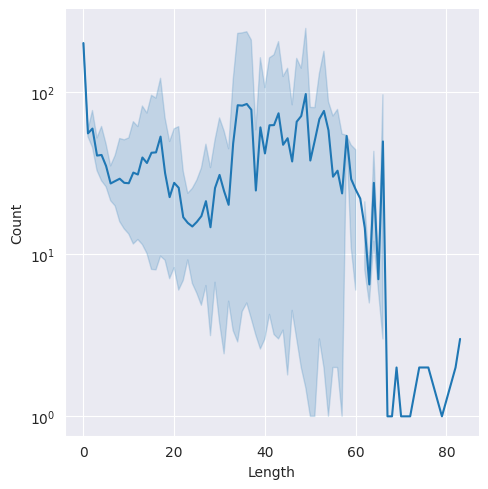

In [58]:
import seaborn as sns

tmp = df.groupby(["Reasoner", "Length"]).count().reset_index().rename(columns={'Subclass': 'Count'}).drop(columns=["Superclass"])

g = sns.relplot(data=tmp, x="Length", y="Count", kind="line")
g.set(yscale="log")

### Test set, non-asserted


In [59]:
summary(proofs_to_df(test_reasoners, 2))


,count,mean
count,20.000000,20.000000
mean,1167.400000,13.498338
std,1859.921628,9.802630
min,261.000000,6.071197
25%,308.750000,7.982990
50%,376.000000,10.533451
75%,623.000000,14.554711
max,7196.000000,43.243527


count    23348.000000
mean        22.731155
std         16.087605
min          2.000000
25%         10.000000
50%         17.000000
75%         35.000000
max         83.000000
Name: Length, dtype: float64